In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from path_tools import *

In [3]:
inpath = r'T:\Trans Projects\South Lane Wheels TDP\2023'

In [4]:
df = pd.read_csv(inpath+'\\route.csv')

In [5]:
df.head()

,Route,Counts,OriginAddress,OriginCity,DestinationAddress,DestinationCity,OriginAddressFull,DestinationAddressFull,InCityLimit,InCityName,OLongitude,OLatitude,DLongitude,DLatitude
0,"74363 Cottage Grove Reservoir Rd, Cottage Grov...",1,74363 Cottage Grove Reservoir Rd,Cottage Grove,225 W Oregon Ave,Creswell,"74363 Cottage Grove Reservoir Rd, Cottage Grov...","225 W Oregon Ave, Creswell, OR",Completely out,Origin in,-123.069851,43.677661,-123.021261,43.917706
1,"1425 Daugherty, Cottage Grove, OR -- 1200 Hily...",1,1425 Daugherty,Cottage Grove,1200 Hilyard,Eugene,"1425 Daugherty, Cottage Grove, OR","1200 Hilyard, Eugene, OR",Origin in,Origin in,-123.072793,43.792940,-123.082748,44.046332
2,"1661 Hwy 99 N, Cottage Grove, OR -- 3915 River...",1,1661 Hwy 99 N,Cottage Grove,3915 River Rd,Eugene,"1661 Hwy 99 N, Cottage Grove, OR","3915 River Rd, Eugene, OR",Origin in,Origin in,-123.051489,43.807380,-123.138644,44.120621
3,"77500 S 6th St, Cottage Grove, OR -- 3355 Rive...",1,77500 S 6th St,Cottage Grove,3355 Riverbend Dr,Springfield,"77500 S 6th St, Cottage Grove, OR","3355 Riverbend Dr, Springfield, OR",Completely out,Origin in,-123.064983,43.765832,-123.027521,44.082236
4,"77399 Mcdole Rd, Cottage Grove, OR -- 32120 Ra...",1,77399 Mcdole Rd,Cottage Grove,32120 Rachel Rd.#B6,Cottage Grove,"77399 Mcdole Rd, Cottage Grove, OR","32120 Rachel Rd.#B6, Cottage Grove, OR",Completely out,Completely in,-123.082353,43.761151,-123.071594,43.777596


In [6]:
df.shape

(109, 14)

In [7]:
G= ox.graph_from_place('Lane County, Oregon, USA')

In [18]:
#n = df.shape[0]-1
n = 32

In [9]:
df.columns

Index(['Route', 'Counts', 'OriginAddress', 'OriginCity', 'DestinationAddress',
       'DestinationCity', 'OriginAddressFull', 'DestinationAddressFull',
       'InCityLimit', 'InCityName', 'OLongitude', 'OLatitude', 'DLongitude',
       'DLatitude'],
      dtype='object')

In [19]:
route, route_line, gdf = get_shortest_route(orgnm = df.OriginAddressFull[n], 
                                            olon = df.OLongitude[n],
                                            olat = df.OLatitude[n],
                                            dstnm = df.DestinationAddressFull[n],
                                            dlon = df.DLongitude[n],
                                            dlat = df.DLatitude[n], G=G)

1200 Hilyard, Eugene, OR -- 1610 Fairview Pl, Cottage Grove, OR


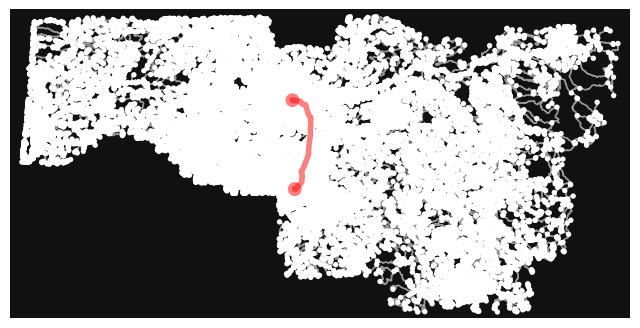

In [20]:
fig, ax = ox.plot_graph_route(G, route)

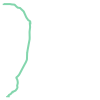

In [21]:
route_line

In [22]:
gdf

,geometry,osm_nodes,length_km,start,end,route
0,"LINESTRING (4242020.112 877874.137, 4242009.82...","[40011748, 6906768237, 7765681693, 8680715390,...",33.843735,"1200 Hilyard, Eugene, OR","1610 Fairview Pl, Cottage Grove, OR","1200 Hilyard, Eugene, OR -- 1610 Fairview Pl, ..."


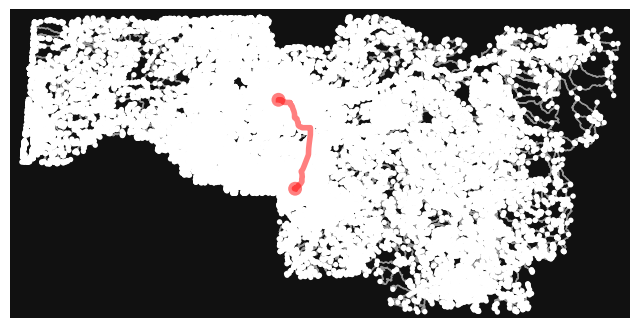

In [21]:
fig, ax = ox.plot_graph_route(G, route)

In [23]:
t0 = time.time()
out = list(df.apply(lambda row: get_shortest_route(row.OriginAddressFull, 
                                                   row.OLongitude, 
                                                   row.OLatitude, 
                                                   row.DestinationAddressFull, 
                                                   row.DLongitude, 
                                                   row.DLatitude, G=G)[2], axis=1))
elapsed = (time.time() - t0) / 60
print('Elapsed time: %.2fminutes' % (elapsed))

74363 Cottage Grove Reservoir Rd, Cottage Grove, OR -- 225 W Oregon Ave, Creswell, OR
1425 Daugherty, Cottage Grove, OR -- 1200 Hilyard, Eugene, OR
1661 Hwy 99 N, Cottage Grove, OR -- 3915 River Rd, Eugene, OR
77500 S 6th St, Cottage Grove, OR -- 3355 Riverbend Dr, Springfield, OR
77399 Mcdole Rd, Cottage Grove, OR -- 32120 Rachel Rd.#B6, Cottage Grove, OR
1515 Village Dr, Cottage Grove, OR -- 1220 Jacobs Dr, Eugene, OR
1620 Bohemia Pl, Cottage Grove, OR -- 1200 Hilyard, Eugene, OR
603 Or-99, Cottage Grove, OR -- 77940 Highway 99 S, Cottage Grove, OR
225 W Oregon Ave, Creswell, OR -- 74363 Cottage Grove Reservoir Rd, Cottage Grove, OR
32120 Rachel Rd.#B6, Cottage Grove, OR -- 77399 Mcdole Rd, Cottage Grove, OR
1068 Hillside Dr, Cottage Grove, OR -- 34168 Scott Rd, Cottage Grove, OR
77500 S 6th St, Cottage Grove, OR -- 1775 E Main St, Cottage Grove, OR
3783 International Ct, Springfield, OR -- 1620 Bohemia Pl, Cottage Grove, OR
1390 E Pennoyer Ave, Cottage Grove, OR -- 77380 Hwy 99 S, C

In [30]:
outgdf = pd.concat(out, ignore_index=True)

In [25]:
outgdf.head()

,geometry,osm_nodes,length_km,start,end,route
0,"LINESTRING (4240704.884 742745.384, 4240385.40...","[39998881, 39867292, 39998900, 3572226222, 397...",29.222022,"74363 Cottage Grove Reservoir Rd, Cottage Grov...","225 W Oregon Ave, Creswell, OR","74363 Cottage Grove Reservoir Rd, Cottage Grov..."
1,"LINESTRING (4241976.938 785474.687, 4241956.14...","[10729343480, 10729343478, 9003602568, 4002758...",33.895639,"1425 Daugherty, Cottage Grove, OR","1200 Hilyard, Eugene, OR","1425 Daugherty, Cottage Grove, OR -- 1200 Hily..."
2,"LINESTRING (4247860.080 790388.170, 4247991.13...","[2120181211, 39712472, 1109624675, 10704149820...",41.112136,"1661 Hwy 99 N, Cottage Grove, OR","3915 River Rd, Eugene, OR","1661 Hwy 99 N, Cottage Grove, OR -- 3915 River..."
3,"LINESTRING (4243723.109 775461.549, 4243664.73...","[39909966, 2897525401, 39884369, 5315799412, 4...",37.399738,"77500 S 6th St, Cottage Grove, OR","3355 Riverbend Dr, Springfield, OR","77500 S 6th St, Cottage Grove, OR -- 3355 Rive..."
4,"LINESTRING (4239215.166 773847.697, 4239215.53...","[10075560612, 10075560611, 39771878, 40025088,...",3.014357,"77399 Mcdole Rd, Cottage Grove, OR","32120 Rachel Rd.#B6, Cottage Grove, OR","77399 Mcdole Rd, Cottage Grove, OR -- 32120 Ra..."


In [34]:
sdf=df[['Route', 'Counts', 'InCityLimit', 'InCityName']].rename(columns={'Route':'route', 
                                                                         'Counts':'counts',
                                                                        'InCityLimit': 'in_limit',
                                                                        'InCityName': 'in_name'})

In [35]:
outgdf1 = outgdf[['route', 'start', 'end', 'length_km', 'geometry']].merge(sdf, on='route')

In [36]:
outgdf1.to_file(inpath+'\\SLW_TDP\\routes.shp')

In [37]:
outgdf1.tail(5)

,route,start,end,length_km,geometry,counts,in_limit,in_name
104,"76431 London Rd, Cottage Grove, OR -- 33618 Je...","76431 London Rd, Cottage Grove, OR","33618 Jenkins Rd, Cottage Grove, OR",10.831251,"LINESTRING (4245831.259 764627.776, 4245796.94...",15,Completely out,Completely in
105,"399 Art Lott Ln, Creswell, OR -- 855 S Seneca ...","399 Art Lott Ln, Creswell, OR","855 S Seneca Rd, Eugene, OR",22.865280,"LINESTRING (4258770.313 831558.815, 4258772.13...",15,Completely out,Completely out
106,"1652 Pritchett Place, Cottage Grove, OR -- 106...","1652 Pritchett Place, Cottage Grove, OR","1061 W 2nd Ave, Eugene, OR",34.264672,"LINESTRING (4247813.052 788724.464, 4247850.90...",16,Origin in,Origin in
107,"2101 W 10th Ave, Eugene, OR -- 420 S 2nd St, C...","2101 W 10th Ave, Eugene, OR","420 S 2nd St, Creswell, OR",22.147276,"LINESTRING (4231487.115 878899.181, 4231633.88...",17,Completely out,Completely out
108,"420 S 2nd St, Creswell, OR -- 2101 W 10th Ave,...","420 S 2nd St, Creswell, OR","2101 W 10th Ave, Eugene, OR",22.146945,"LINESTRING (4257171.081 828782.790, 4256993.48...",20,Completely out,Completely out
